In [1]:
import copy as cp
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
import pickle as pkl
import sklearn as skl
import sys
sys.path.append('../0_python_modules/')
import extras
import navjeet_hist as nh

/home/msahil/softwares/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
tlags=[10, 20, 30, 50, 70, 100, 150, 200, 250, 350, 500, 700, 1000, 1500, 2000]

In [3]:
exps_sa = 2.85

weights = np.loadtxt('../1_datasets/ASH1/rg_ca.xvg', comments=['@','#'])[:,1]
weights = np.where(weights > exps_sa)[0].shape[0]/weights.shape[0]
weights

0.3530981256890849

In [4]:
htlags = np.load('saved_direct/tlags.npy')

In [5]:
htlags.shape

(15, 100, 100)

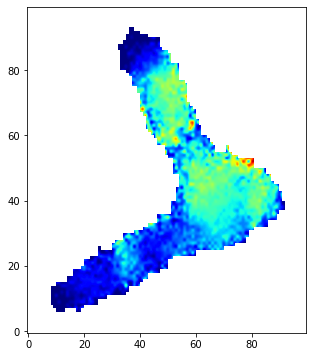

In [18]:
fig,ax = plt.subplots(1,figsize=(5,6))
t = -1
ax.imshow(htlags[t], 
          aspect='auto', origin='lower', interpolation='gaussian',
          cmap='jet', vmin=0, vmax=1)
plt.show()

In [6]:
ctlags = np.array([
    nh.classification_extent(i, 
                            cutoff=0.1, strategy='weighted',
                            output_type='jm', operation=2, jm_lower=weights)
for i in htlags])

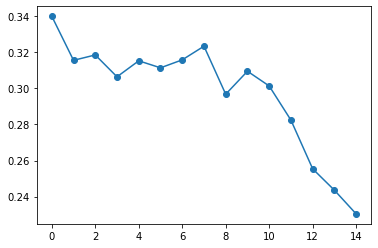

In [7]:
plt.plot(ctlags, '-o')

In [19]:
def clusters(hc,nids=range(2,11)):
    for h in nids:
        hl=extras.get_hc_dtraj(hc,h)
        print(h,{i:np.where(hl==i)[0].shape[0] for i in np.unique(hl)})

In [20]:
clusters(np.load('saved_furf/hc_permute.npy'))

2 {0: 284, 1: 135766}
3 {0: 284, 1: 86223, 2: 49543}
4 {0: 284, 1: 86223, 2: 10877, 3: 38666}
5 {0: 284, 1: 10877, 2: 38666, 3: 61389, 4: 24834}
6 {0: 284, 1: 10877, 2: 38666, 3: 61389, 4: 24592, 5: 242}
7 {0: 284, 1: 10877, 2: 38666, 3: 24592, 4: 242, 5: 55503, 6: 5886}
8 {0: 284, 1: 10877, 2: 38666, 3: 24592, 4: 242, 5: 55503, 6: 5, 7: 5881}
9 {0: 284, 1: 10877, 2: 24592, 3: 242, 4: 55503, 5: 5, 6: 5881, 7: 16288, 8: 22378}
10 {0: 284, 1: 10877, 2: 24592, 3: 242, 4: 5, 5: 5881, 6: 16288, 7: 22378, 8: 1783, 9: 53720}


In [22]:
fimp = np.array([
    [
        np.load(f'saved_furf/fimp_hlabel{h}_{i}.npy')
    for i in range(5)]
for h in range(2,11)])
fimp = np.mean(fimp, axis=1), np.std(fimp,axis=1)
cumsum = np.array([np.cumsum(i[i.argsort()[::-1]]) for i in fimp[0]])

In [25]:
fimp[1].max()

0.0026926625412199974

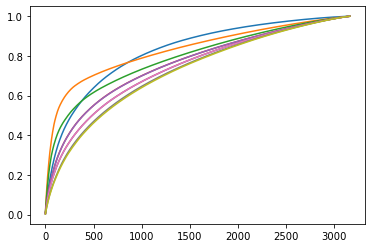

In [26]:
for i in cumsum:plt.plot(i)

(0.0, 500.0)

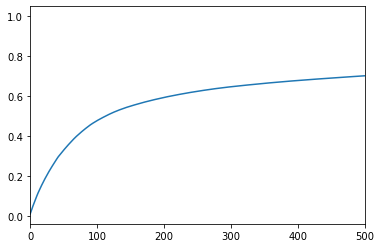

In [76]:
plt.plot(cumsum[1])
plt.xlim(0,500)

In [8]:
hftry = np.load('saved_furf/ftry.npy')

In [37]:
hftry.shape

(9, 5, 3, 15, 100, 100)

In [9]:
cftry = np.array([
    [
        [
            [
                nh.classification_extent(l,
                                        cutoff=0.1, strategy='weighted',
                                         output_type='jm', operation=2, jm_lower=weights)
            for l in k]
        for k in j]
    for j in i]
for i in hftry])
cftry = np.mean(cftry, axis=1), np.std(cftry, axis=1)

In [40]:
cftry[0].shape

(9, 3, 15)

In [78]:
cftry[0][:,1,0]

array([0.74161168, 0.53592355, 0.72617516, 0.86152418, 0.86161339,
       0.80510899, 0.81430202, 0.6058645 , 0.69606456])

In [79]:
cftry[1][:,1,0]

array([0.01218853, 0.00829424, 0.06658002, 0.00486692, 0.00344237,
       0.02686093, 0.03085217, 0.05374924, 0.0368616 ])

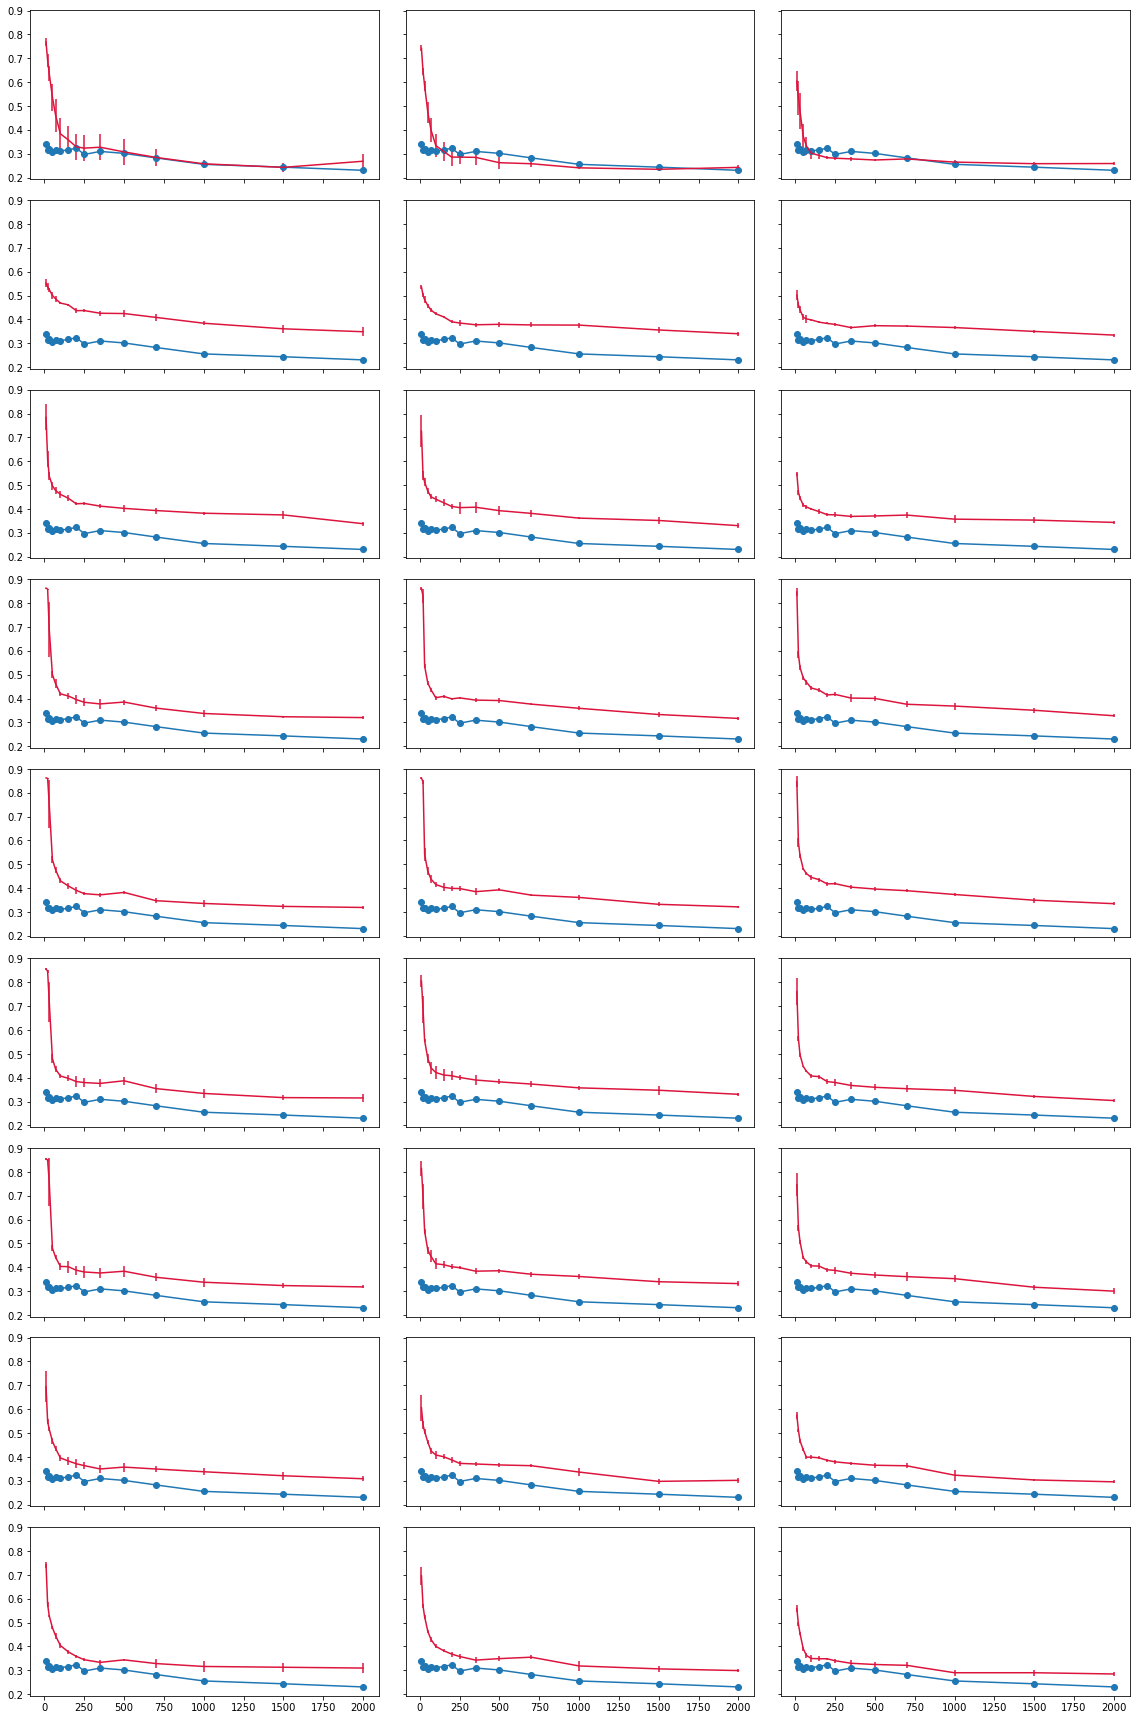

In [85]:
fig,ax=plt.subplots(9,3,figsize=(16,24), sharex=True, sharey=True)
plt.tight_layout()
for i in range(9):
    for j in range(3):
        ax[i,j].errorbar(tlags, cftry[0][i,j], yerr=cftry[1][i,j], color='crimson')
        ax[i,j].plot(tlags, ctlags, '-o')
plt.show()

In [12]:
ctlags.shape

(15,)

In [16]:
cftry[0].shape

(9, 3, 15)

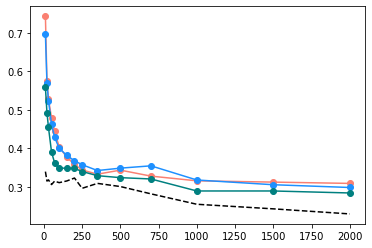

In [27]:
h=10
plt.plot(tlags, ctlags, '--', c='black')
plt.plot(tlags, cftry[0][h-2][0], '-o', c='salmon')
plt.plot(tlags, cftry[0][h-2][1], '-o', c='dodgerblue')
plt.plot(tlags, cftry[0][h-2][2], '-o', c='teal')